<!-- Title -->
<h1 align="center">
  Digital Epidemiology Project
</h1>

<!-- Subtitle -->
<h2 align="center">
   Data-Driven Stochastic Hybrid Model
</h2>

## User

In [1]:
#@everywhere user="PietroMonticone1";
#user="PietroMonticone2";
#user="DavideOrsenigo";
#interrupt()

## Modules

In [1]:
# Parallel Computation
using Distributed
#addprocs(1);
#interrupt()

In [2]:
@everywhere user="PietroMonticone1";
#user="PietroMonticone2";
#user="DavideOrsenigo";

In [3]:
# Data Management 
@everywhere using DataFrames, DataFramesMeta, DrWatson, Queryverse, NPZ
# Statistics
@everywhere using StatsBase, Distributions, Random
# Graphs 
@everywhere using LightGraphs, SimpleWeightedGraphs, MetaGraphs, GraphIO, GraphPlot
# Modelling
@everywhere using Agents
# Numerical Computation 
@everywhere using LinearAlgebra
# Visualization
@everywhere using Plots, AgentsPlots, PlotThemes, Images, ImageIO
# Custom Module
if user == "PietroMonticone1"
    @everywhere Epi = include("/Users/Pit/GitHub/DigitalEpidemiologyProject/Notebooks/Modelling/Julia/MetapopABM/DigitalEpidemiology.jl")
elseif user == "PietroMonticone2"
    @everywhere Epi = include("/Users/pietromonticone/github/DigitalEpidemiologyProject/Notebooks/Modelling/Julia/MetapopABM/DigitalEpidemiology.jl")
elseif user == "DavideOrsenigo"
    @everywhere Epi = include(raw"C:\Users\Utente\Desktop\Progetti\GitHub\DigitalEpidemiologyProject\Notebooks\Modelling\Julia\MetapopABM\DigitalEpidemiology.jl");
end

## Data

### Geospatial

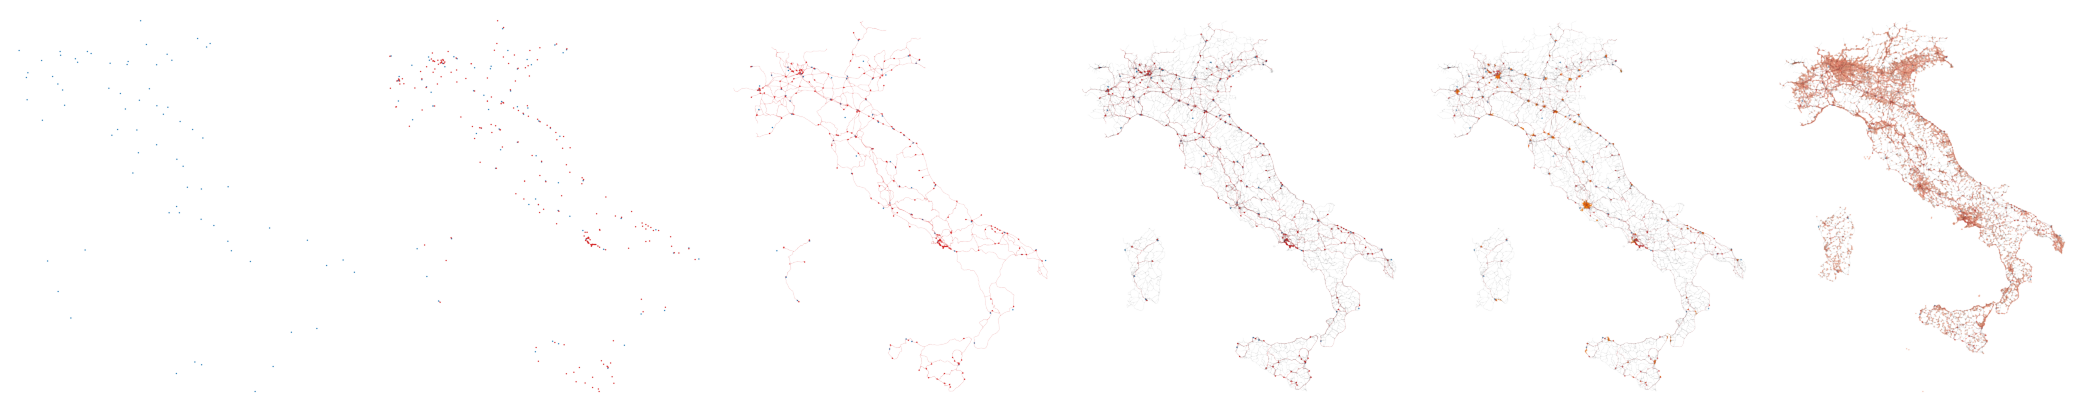

In [4]:
# Load fine-grained geospatial images
a=Epi.LoadImage("Airports", user);
as=Epi.LoadImage("Airports+Stations", user);
asr=Epi.LoadImage("Airports+Stations+Railways", user);
asrr=Epi.LoadImage("Airports+Stations+Railways+Roads", user);
asrrb=Epi.LoadImage("Airports+Stations+Railways+Roads+Built1", user);
asrrbb=Epi.LoadImage("Airports+Stations+Railways+Roads+Built1+Built2", user);
[a as asr asrr asrrb asrrbb]

### Administrative 

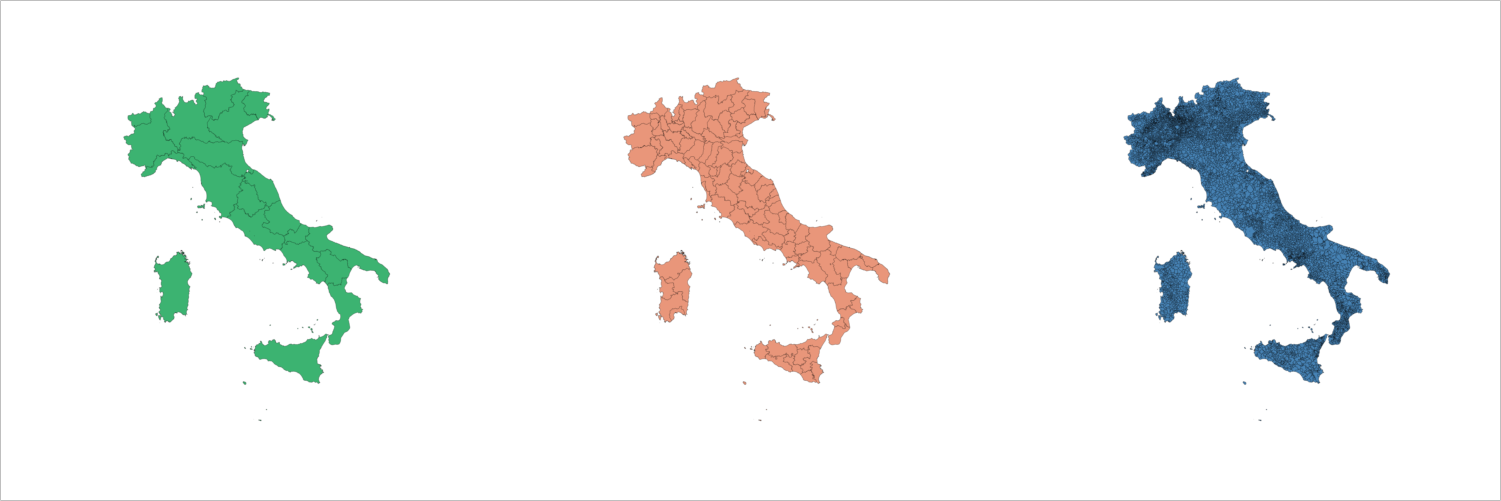

In [5]:
#Load multi-scale administrative maps
regions=Epi.LoadImage("Regions", user);
provinces=Epi.LoadImage("Provinces", user);
municipalities=Epi.LoadImage("Municipalities", user);
[regions provinces municipalities]

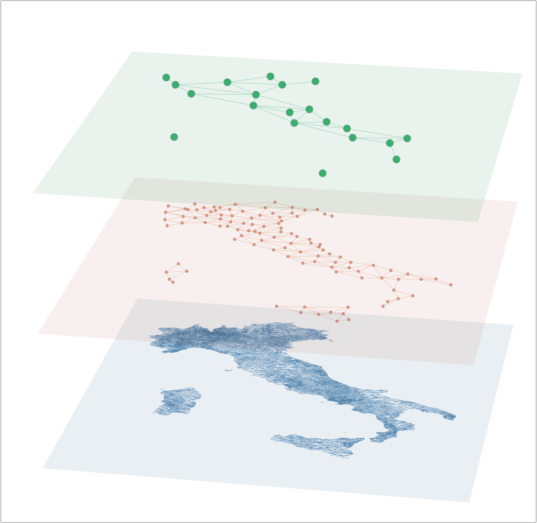

In [6]:
# Load multi-layer administrative proximity graph image 
proximity_multiplex_graph = Epi.LoadImage("AdministrativeProximityMultiplexGraph", user) 

### Population

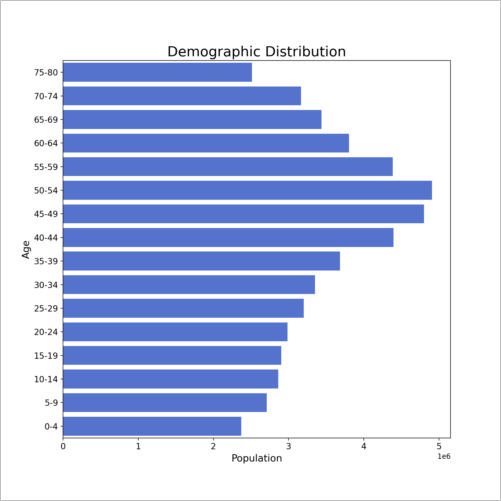

In [7]:
# Load population data
@everywhere population_data = Epi.LoadData("ProvincialPopulation", user);
# Load age-stratified population data
@everywhere age_population_data = Epi.LoadData("AgeStratifiedProvincialPopulation", user); 
# Load population pyramid image 
population_age_structure = Epi.LoadImage("AgeStructure", user) 

### Contact

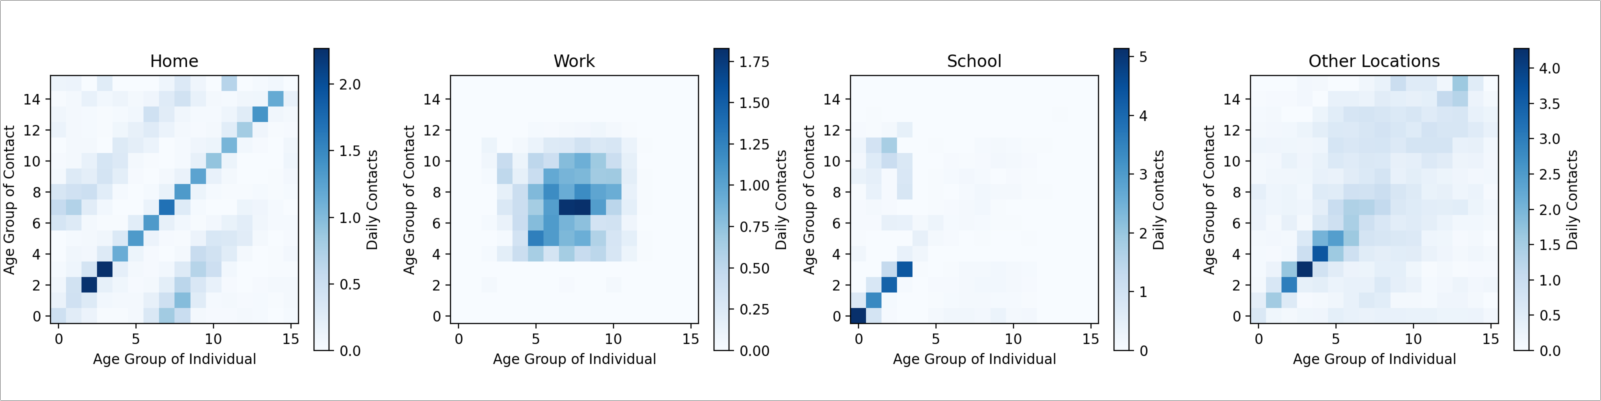

In [8]:
# Load contact data for all locations
@everywhere all_contact_data=Epi.LoadData("AllEdgeList", user)
# Build contact graph for all locations
@everywhere all_contact_graph=SimpleWeightedDiGraph(all_contact_data[1].+1, all_contact_data[2].+1, all_contact_data[3]);
# Load contact matrix plot for all locations
all_contact_image=Epi.LoadImage("All", user)

# Load contact data for home
@everywhere home_contact_data=Epi.LoadData("HomeEdgeList", user)
# Build contact graph for home
@everywhere home_contact_graph=SimpleWeightedDiGraph(home_contact_data[1].+1, home_contact_data[2].+1, home_contact_data[3]);
# Load contact matrix plot for home
home_contact_image=Epi.LoadImage("Home", user)

# Load contact data for work
@everywhere work_contact_data=Epi.LoadData("WorkEdgeList", user)
# Build contact graph for work
@everywhere work_contact_graph=SimpleWeightedDiGraph(work_contact_data[1].+1, work_contact_data[2].+1, work_contact_data[3]);
# Load contact matrix plot for work
work_contact_image=Epi.LoadImage("Work", user)

# Load contact data for school
@everywhere school_contact_data=Epi.LoadData("SchoolEdgeList", user)
# Build contact graph for school
@everywhere school_contact_graph=SimpleWeightedDiGraph(school_contact_data[1].+1, school_contact_data[2].+1, school_contact_data[3]);
# Load contact matrix plot for school
school_contact_image=Epi.LoadImage("School", user)

# Load contact data for other locations
@everywhere other_contact_data=Epi.LoadData("OtherEdgeList", user)
# Build contact graph for other locations
@everywhere other_contact_graph=SimpleWeightedDiGraph(other_contact_data[1].+1, other_contact_data[2].+1, other_contact_data[3]);
# Load contact matrix plot for other locations
other_contact_image=Epi.LoadImage("Other", user)

[home_contact_image work_contact_image school_contact_image other_contact_image]

### Mobility

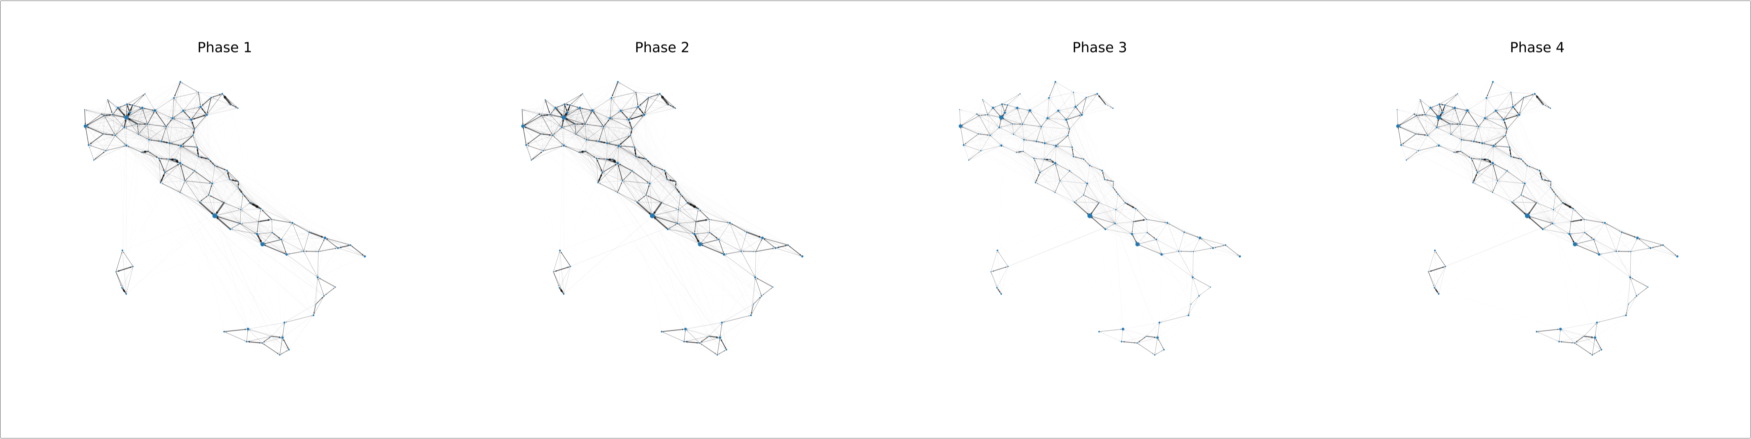

In [9]:
# Load mobility data
@everywhere mobility_data_phase1 = Epi.LoadData("Flow1", user)
@everywhere mobility_data_phase2 = Epi.LoadData("Flow2", user)
@everywhere mobility_data_phase3 = Epi.LoadData("Flow3", user)
@everywhere mobility_data_phase4 = Epi.LoadData("Flow4", user)
# Build mobility graphs 
@everywhere mobility_graph_phase1 = SimpleWeightedDiGraph(mobility_data_phase1[1], mobility_data_phase1[2], mobility_data_phase1[3])
@everywhere mobility_graph_phase2 = SimpleWeightedDiGraph(mobility_data_phase2[1], mobility_data_phase2[2], mobility_data_phase2[3])
@everywhere mobility_graph_phase3 = SimpleWeightedDiGraph(mobility_data_phase3[1], mobility_data_phase3[2], mobility_data_phase3[3])
@everywhere mobility_graph_phase4 = SimpleWeightedDiGraph(mobility_data_phase4[1], mobility_data_phase4[2], mobility_data_phase4[3])
# Build initial mobility graph
@everywhere mobility_graph = SimpleWeightedDiGraph(mobility_data_phase1[1], mobility_data_phase1[2], mobility_data_phase1[3])
# Remove the 104/5/6/7th node: provincial code doesn't exist
for i in 1:4
    rem_vertex!(mobility_graph_phase1, 104)
    rem_vertex!(mobility_graph_phase2, 104)
    rem_vertex!(mobility_graph_phase3, 104)
    rem_vertex!(mobility_graph_phase4, 104)
    rem_vertex!(mobility_graph, 104)
end
# Load mobility images
mobility_phase1_image = Epi.LoadImage("Phase1", user)	
mobility_phase2_image = Epi.LoadImage("Phase2", user)
mobility_phase3_image = Epi.LoadImage("Phase3", user)
mobility_phase4_image = Epi.LoadImage("Phase4", user)
#Display mobility images
[mobility_phase1_image mobility_phase2_image mobility_phase3_image mobility_phase4_image]

### Epidemiological

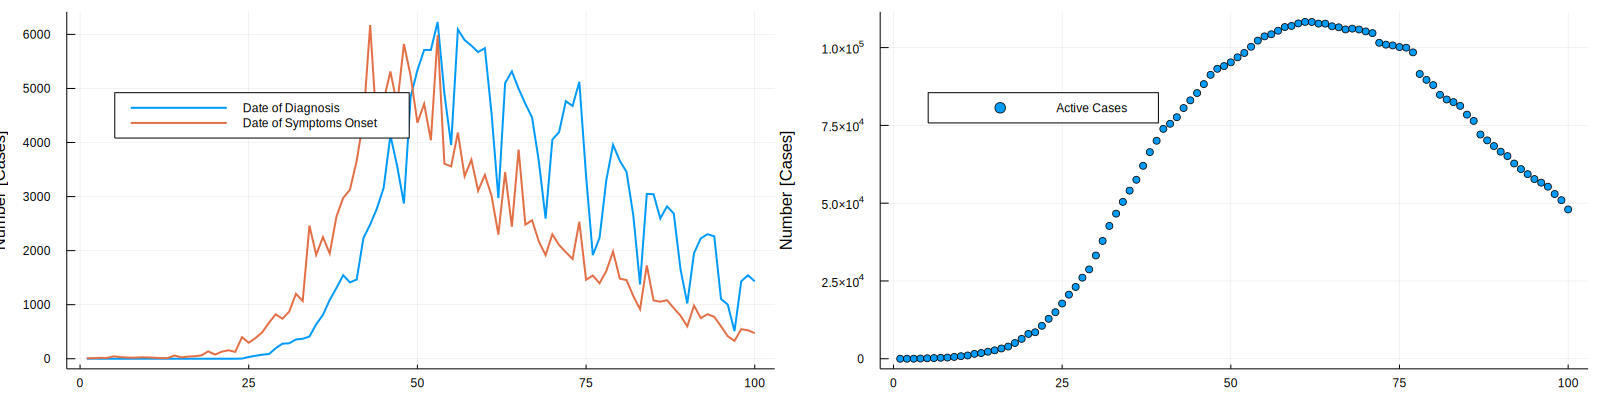

In [21]:
# Load data on confirmed COVID-19 active cases
@everywhere active_cases=Epi.LoadData("Active", user) 
# Load data on confirmed COVID-19 cases by date of diagnosis and symptoms onset
@everywhere symptoms_diagnosis_cases=Epi.LoadData("SymptomsDiagnosis", user)
# Load data on COVID-19 tests and tested patients
@everywhere tests = Epi.LoadData("Tests", user).DailyTestsWeeklyAverage

# Plot time series of confirmed COVID-19 cases by date of diagnosis vs. symptoms onset
plot_cases=plot(1:100,symptoms_diagnosis_cases["Diagnosis"][1:100],
                label="Date of Diagnosis",
                xlab="Time [Days]",
                ylabel="Number [Cases]",
                #title="COVID-19 Confirmed Cases in Italy", 
                legend=:topleft,
                lw=2)
            plot!(plot_cases,1:100,symptoms_diagnosis_cases["Symptoms"][1:100],
                 label="Date of Symptoms Onset",
                 lw=2);
# Plot time series confirmed confirmed COVID-19 active cases 
plot_active=plot(1:100,active_cases["Active Cases"][1:100],
    label="Active Cases",
    xlab="Time [Days]",
    ylabel="Number [Cases]",
    #title="COVID-19 Confirmed Cases in Italy", 
    legend=:topleft,
    lw=2,
    seriestype=:scatter);
# Display time series 
plot(plot_cases, plot_active, layout=2, size=(1600,400))

## Agent Type

In [12]:
# Patient Definition
@everywhere mutable struct Patient <: AbstractAgent
    id::Int                   # identity code ∈ ℕ               
    pos::Int                  # location node ∈ ℕ 
    age_group::Int            # age group ∈ [1,16] ⊂ ℕ
    residence::Int            # residence node ∈ ℕ 
    work_pos::Int             # workplace node ∈ ℕ 
    household::Array          # household community
    workplace::Array          # workplace community
    status::Symbol            # infection status ∈ {S,E,I_a,I_p,I_s,H,ICU,R,D}
    diagnosis::Symbol         # ∈ {O,N,P,W,R} 
    status_delay_left::Int    # delay counter for infection status
    diagnosis_delay_left::Int # delay counter for diagnosis 
    #contact_tracing_app::Bool # Download: {True, False}
end;

    #prescription::Symbol # ∈ {O, Q, ICU}
    #serological
    #contact-tracing
    #fear, risk aversion -> individual-based social distancing 

## Dynamics

In [13]:
@everywhere function model_step!(model)
    # Initialize geospatial 2-array
    model.geo=[]
    # Initialize contact-tracing array
    ###model.contact_tracing_array=[]
    # Increment clock
    model.t+=1
    # Select testing strategy
	### Epi.test!(model,"base_passive_random_uniform_national")
	### Epi.test!(model,"passive_random_uniform_national")
	### Epi.test!(model,"passive_random_uniform_provincial") #ONLY FOR LARGE N
	Epi.test!(model,"passive_biased_symptoms_national")
	### Epi.test!(model,"passive_biased_symptoms_provincial")
    # Select mobility phase
	if model.t≤11 
		Epi.phase1!(model)
	elseif model.t≤11+model.delay
		Epi.phase2!(model)
    elseif model.t>11+model.delay #model.t≤11+22+65
		Epi.phase3!(model)
    #else
	#	Epi.phase4!(model) #elseif model.t≤11+22+65+28
	end
    # Update geospatial 2-array
    for prov in 1:model.M 
        append!(model.geo, length([agent.id for agent in get_node_agents(prov, model) if agent.status !=:S && agent.status !=:R && agent.status !=:D])) #length([agent.id for agent in get_node_agents(prov, model) if agent.status !=:S && agent.status !=:R && agent.status !=:D])
    end
end;

@everywhere function agent_step!(agent, model)
    # Remove died patients
	agent.status==:D && return
    
    # Exposure at home
    if length(agent.household)>0  
        home_contacted_agents=Epi.contact!(agent, model,"home")
        #for contacted_agent in home_contacted_agents
        #    if contacted_agent.contact_tracing_app==true && agent.contact_tracing_app==true
        #        add_edge!(contact_tracing_graph, contacted_agent.id, agent.id, LightGraphs.weights(contact_tracing_graph)[contacted_agent.id,agent.id]+1)
        #        push!(model.contact_tracing_array, (contacted_agent.id, agent.id))
        #    end
        #end
        Epi.get_exposed!(agent, model, home_contacted_agents)
    end
    
    # Isolation Condition
    if agent.diagnosis !=:P && agent.diagnosis !=:W
        # Mobility dynamics
        if rand() ≤ (1-2/7) && agent.work_pos != 0
            agent.pos = agent.work_pos
        else
            Epi.migrate!(agent, model)  
        end

        # Exposure at work
        if length(agent.workplace)>0 
            work_contacted_agents=Epi.contact!(agent, model,"work") 
            #for contacted_agent in work_contacted_agents
            #    if contacted_agent.contact_tracing_app==true && agent.contact_tracing_app==true
            #        add_edge!(contact_tracing_graph, contacted_agent.id, agent.id, LightGraphs.weights(contact_tracing_graph)[contacted_agent.id,agent.id]+1)
            #        push!(model.contact_tracing_array, (contacted_agent.id, agent.id))
            #    end
            #end
            Epi.get_exposed!(agent, model, work_contacted_agents)    
        end  
        # Exposure at school
        if model.phase != 3 
            school_contacted_agents=Epi.contact!(agent, model,"school")
            #for contacted_agent in school_contacted_agents
            #    if contacted_agent.contact_tracing_app==true && agent.contact_tracing_app==true
            #        add_edge!(contact_tracing_graph, contacted_agent.id, agent.id, LightGraphs.weights(contact_tracing_graph)[contacted_agent.id,agent.id]+1)
            #        push!(model.contact_tracing_array, (contacted_agent.id, agent.id))
            #    end
            #end
            Epi.get_exposed!(agent, model, school_contacted_agents) 
        end
        # Exposure at other locations
        other_contacted_agents=Epi.contact!(agent, model,"other") 
        #for contacted_agent in other_contacted_agents
        #    if contacted_agent.contact_tracing_app==true && agent.contact_tracing_app==true
        #        add_edge!(contact_tracing_graph, contacted_agent.id, agent.id, LightGraphs.weights(contact_tracing_graph)[contacted_agent.id,agent.id]+1)
        #        push!(model.contact_tracing_array, (contacted_agent.id, agent.id))
        #    end
        #end
        Epi.get_exposed!(agent, model, other_contacted_agents) 
    end
    
    # Infection dynamics
	Epi.get_infected!(agent, model) 
    # Symptoms onset
	Epi.get_symptoms!(agent, model)       
    # Recovery dynamics
	Epi.recover_or_die!(agent, model)           
    
    # Mobility dynamics 
	Epi.move_back_home!(agent, model)
    
    # Delays update 
	if agent.status_delay_left>0
		agent.status_delay_left-=1
	end
    if agent.diagnosis_delay_left>0
		agent.diagnosis_delay_left-=1
	end
end;

## Parameters

In [14]:
# Time 
@everywhere δt=1
@everywhere nsteps=233 # max 233 (length(capacity_array))
@everywhere tf=nsteps*δt
@everywhere t=0:δt:tf;
@everywhere delay=0

In [15]:
# Population
@everywhere scale_factor=4000
@everywhere provincial_pops=round.(Int, population_data.population./scale_factor) 
@everywhere age_provincial_pops=round.(Int, age_population_data./scale_factor) 
@everywhere N = sum(Array(age_provincial_pops))  # number of agents
@everywhere M = length(provincial_pops)          # number of provincial subpopulations
@everywhere K = length(age_provincial_pops[1])   # number of age groups (16)

In [16]:
# Migration rates
@everywhere h=0.8 #home

# Initial conditions
@everywhere I0=1 # round(Int, N/2000)

# Health system
###@everywhere capacity=round(Int, N*1*10^(-3)); # Total tests in phase 2 and 3 
@everywhere tests[1:6] = fill(tests[7],6)
@everywhere capacity_array = round.(Int, vcat(zeros(38), tests./scale_factor))

# Contact-tracing coverage
@everywhere contact_tracing_coverage = 1 # PARAMSCAN
# Initialize contact-tracing graph
@everywhere contact_tracing_graph = SimpleWeightedDiGraph(N)

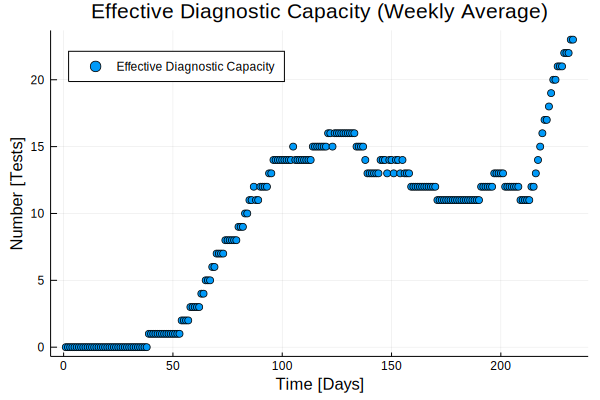

In [17]:
plot(1:length(capacity_array),capacity_array,
                label="Effective Diagnostic Capacity",
                xlab="Time [Days]",
                ylabel="Number [Tests]",
                title="Effective Diagnostic Capacity (Weekly Average)", 
                legend=:topleft,
                seriestype = :scatter)

## Modelling Framework

### Epidemic Module

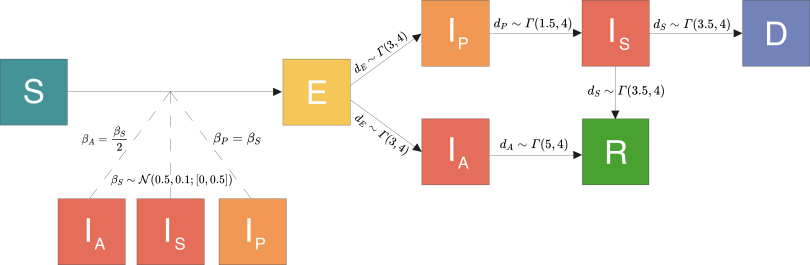

In [11]:
# Load images of the compartmental epidemic model diagrams 
epidemic_model_diagram = Epi.LoadImage("EpidemicModelDiagram", user) 

### Surveillance Module

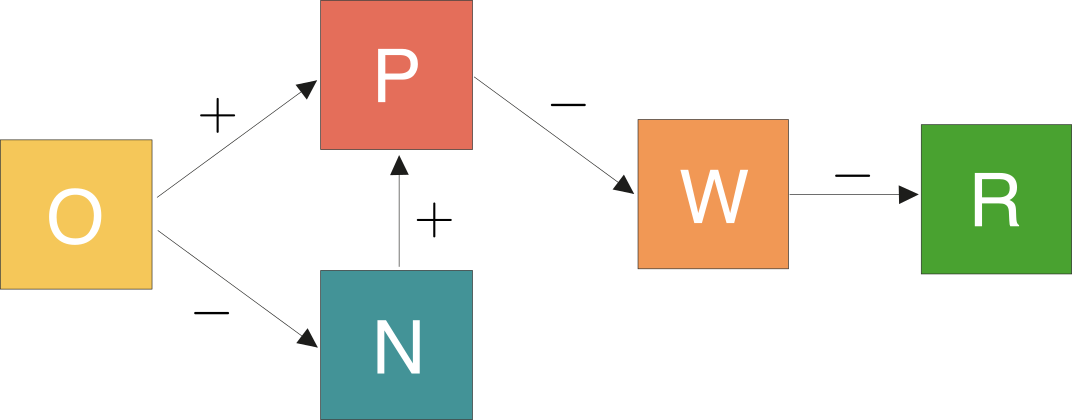

In [12]:
# Load images of the compartmental surveillance/diagnostic model diagrams 
surveillance_model_diagram= Epi.LoadImage("SurveillanceModelDiagram", user) 

### Behavioral Module

In [20]:
# Load images of the compartmental behavioral model diagrams 

### Initialization 

In [27]:
# Model initialization 
@everywhere function InitializeModel(t::Int, capacity_array::Array{Int,1}, provincial_pops::Array{Int,1}, age_provincial_pops::DataFrame, 
		home_contact_graph::SimpleWeightedDiGraph{Int64,Float64}, work_contact_graph::SimpleWeightedDiGraph{Int64,Float64}, school_contact_graph::SimpleWeightedDiGraph{Int64,Float64}, other_contact_graph::SimpleWeightedDiGraph{Int64,Float64}, contact_tracing_graph::SimpleWeightedDiGraph{Int64,Float64},
		mobility_graph::SimpleWeightedDiGraph{Int64,Float64}, mobility_graph_phase1::SimpleWeightedDiGraph{Int64,Float64},mobility_graph_phase2::SimpleWeightedDiGraph{Int64,Float64},mobility_graph_phase3::SimpleWeightedDiGraph{Int64,Float64},mobility_graph_phase4::SimpleWeightedDiGraph{Int64,Float64},
		h::Real,I0::Int, contact_tracing_coverage::Real, delay::Int)
	
	# Set populations
	N = sum(Array(age_provincial_pops))  # number of agents
	M = length(provincial_pops)          # number of subpopulations
	K = length(age_provincial_pops[1])   # number of age groups (16)
    ###R = length(keys(regions))
	# Initialize id 
	id = 0    
	# Initialize Phase 
	phase = 1
    # Initialize Geospatial
    geo = []
    # Initialize Contact-Tracing array
    contact_tracing_array=[]
    
	# Define the dictionary of model properties
	properties = @dict(t, phase, capacity_array,
		home_contact_graph, work_contact_graph, school_contact_graph, other_contact_graph,
		mobility_graph, mobility_graph_phase1,mobility_graph_phase2,mobility_graph_phase3,mobility_graph_phase4,
		provincial_pops, age_provincial_pops,
		h, I0, geo, contact_tracing_array, delay,
		N, M, K) #, R

	# Instantiate graph ambient space
	space = GraphSpace(mobility_graph) 
	# Instatiate model
	model = ABM(Patient, space; properties = properties)

	# Populate the model
	for province ∈ 1:M
		for age ∈ 1:K 
			for n ∈ 1:age_provincial_pops[province][age]
				id+=1
				residence=province
                work_pos=0
				household=[]
                workplace=[]
				pos=residence
				age_group=age
				status=:S
				diagnosis=:O
				status_delay_left=-1
                diagnosis_delay_left=-1
                #contact_tracing_app=false
				add_agent!(pos, model, age_group, residence, work_pos, household, workplace, status, diagnosis, status_delay_left, diagnosis_delay_left)#, contact_tracing_app)
			end
		end
	end
    
    # Create a list of all agents
    agents = [agent for agent in allagents(model)]
    
    #Initialize households & workplaces
    for agent in agents 
        Epi.InitializeHousehold(agent, model)
        Epi.InitializeWorkplace(agent, model)
        #if rand() ≤ contact_tracing_coverage
        #    agent.contact_tracing_app = true
        #end
    end
    
    # Initialize infected agents 
    codogno_agents = get_node_agents(98,model)
	for agent in StatsBase.sample(codogno_agents, I0)
		agent.status = :E
		agent.status_delay_left = round(Int, rand(Gamma(3,4)))
    end
    roma_agents = get_node_agents(58,model)
    for agent in StatsBase.sample(roma_agents, I0)
		agent.status = :E
		agent.status_delay_left = round(Int, rand(Gamma(3,4)))
    end
	
	return model
end;

### Simulations 

In [28]:
# Seed Selection
#@everywhere Random.seed!(1234);
# Initialize the model
@everywhere model = InitializeModel(0, capacity_array,
    # Population 
	provincial_pops, age_provincial_pops,
    # Contact  
	home_contact_graph, work_contact_graph, school_contact_graph, other_contact_graph, contact_tracing_graph,
    # Mobility  
	mobility_graph, mobility_graph_phase1, mobility_graph_phase2, mobility_graph_phase3, mobility_graph_phase4,
    # Free parameters
	h, I0, contact_tracing_coverage, delay)

# Surveillance 
@everywhere susceptible(status) = count(i == :S for i in status)
@everywhere exposed(status) = count(i == :E for i in status)
@everywhere infected_presymptomatic(status) = count(i == :I_p for i in status)
@everywhere infected_symptomatic(status) = count(i == :I_s for i in status)
@everywhere infected_asymptomatic(status) = count(i == :I_a for i in status)
@everywhere infected(status) =exposed(status)+infected_asymptomatic(status)+infected_presymptomatic(status)+infected_symptomatic(status)
# @everywhere active(diagnosis) = count(i == :P for i in diagnosis);

@everywhere recovered(status) = count(i == :R for i in status)
@everywhere dead(status) = count(i == :D for i in status);
###total_tests = nsteps * capacity
###daily_tests = capacity
@everywhere tested(diagnosis) = count(i != :O for i in diagnosis);
#daily_tested(diagnosis)= count
@everywhere positive(diagnosis) = count(i == :P for i in diagnosis); # active
@everywhere positive_rate(diagnosis)=positive(diagnosis)/(tested(diagnosis)+0.01)
#positive_rate(diagnosis)=positive(diagnosis)/capacity # new_positives/cpacity or #positives/ || "daily tests" != "daily tested people"
@everywhere infected_rate(status) = infected(status) / model.N

# Data Collection
@everywhere to_collect = 
    [(:status, susceptible),(:status, exposed),(:status, infected_presymptomatic),(:status, infected_symptomatic),(:status, infected_asymptomatic),
     (:status, infected),(:status, recovered),(:status, dead),(:status, infected_rate),
	 (:diagnosis, tested),(:diagnosis, positive),(:diagnosis, positive_rate)]

#agent_data, model_data = @time run!(model, agent_step!, model_step!, nsteps, agents_first=false; 
#                                   adata = to_collect, mdata=[:geo, :contact_tracing_array],replicates=8, parallel=true); 

In [29]:
#@time open("contact_tracing_array.txt","w") do io
#   println(io,model_data.contact_tracing_array)
#end

In [30]:
#savegraph("cumulative_contact_tracing_graph.graphml", contact_tracing_graph, GraphMLFormat())

In [31]:
#model_geo_data = DataFrame(model_data.geo[2:nsteps])
#agent_data |> save("agent_data.csv")
#model_geo_data |> save("model_geo_data.csv")

### Parameter Sensitivity Analysis 

In [32]:
delay_array=[0,11,22]
agent_data = fill( DataFrame(), length(delay_array) )
model_data = fill( DataFrame(), length(delay_array) )
i=1
for delay_value in delay_array
    # Seed Selection
    @everywhere Random.seed!(1234);
    @everywhere model = InitializeModel(0, capacity_array,
        # Population 
        provincial_pops, age_provincial_pops,
        # Contact  
        home_contact_graph, work_contact_graph, school_contact_graph, other_contact_graph, contact_tracing_graph,
        # Mobility  
        mobility_graph, mobility_graph_phase1, mobility_graph_phase2, mobility_graph_phase3, mobility_graph_phase4,
        # Free parameters
        h, I0, contact_tracing_coverage, delay_value)
    agent_data[i], model_data[i] = @time run!(model, agent_step!, model_step!, nsteps, agents_first=false; 
                                              adata = to_collect, mdata=[:geo],replicates=6, parallel=false);
    i+=1
end

2686.609714 seconds (12.89 G allocations: 853.913 GiB, 6.70% gc time)
2907.542346 seconds (13.04 G allocations: 870.669 GiB, 6.27% gc time)
3010.513650 seconds (13.20 G allocations: 887.398 GiB, 6.47% gc time)


In [39]:
gd1=groupby(agent_data[1], [:step])

GroupedDataFrame with 234 groups based on key: step
First Group (6 rows): step = 0. Omitted printing of 11 columns
│ Row │ step  │ susceptible_status │ exposed_status │
│     │ Int64 │ Int64              │ Int64          │
├─────┼───────┼────────────────────┼────────────────┤
│ 1   │ 0     │ 13931              │ 2              │
│ 2   │ 0     │ 13931              │ 2              │
│ 3   │ 0     │ 13931              │ 2              │
│ 4   │ 0     │ 13931              │ 2              │
│ 5   │ 0     │ 13931              │ 2              │
│ 6   │ 0     │ 13931              │ 2              │
⋮
Last Group (6 rows): step = 233. Omitted printing of 11 columns
│ Row │ step  │ susceptible_status │ exposed_status │
│     │ Int64 │ Int64              │ Int64          │
├─────┼───────┼────────────────────┼────────────────┤
│ 1   │ 233   │ 13906              │ 0              │
│ 2   │ 233   │ 13124              │ 56             │
│ 3   │ 233   │ 12188              │ 211            │
│ 4   │ 233   │ 12283              │ 124            │
│ 5   │ 233   │ 12923              │ 158            │
│ 6   │ 233   │ 12847              │ 93             │

In [37]:
model_data[1]

1404×3 DataFrame. Omitted printing of 2 columns
│ Row  │ step  │
│      │ Int64 │
├──────┼───────┤
│ 1    │ 0     │
│ 2    │ 1     │
│ 3    │ 2     │
│ 4    │ 3     │
│ 5    │ 4     │
│ 6    │ 5     │
│ 7    │ 6     │
│ 8    │ 7     │
│ 9    │ 8     │
│ 10   │ 9     │
⋮
│ 1394 │ 223   │
│ 1395 │ 224   │
│ 1396 │ 225   │
│ 1397 │ 226   │
│ 1398 │ 227   │
│ 1399 │ 228   │
│ 1400 │ 229   │
│ 1401 │ 230   │
│ 1402 │ 231   │
│ 1403 │ 232   │
│ 1404 │ 233   │

## Visualizations

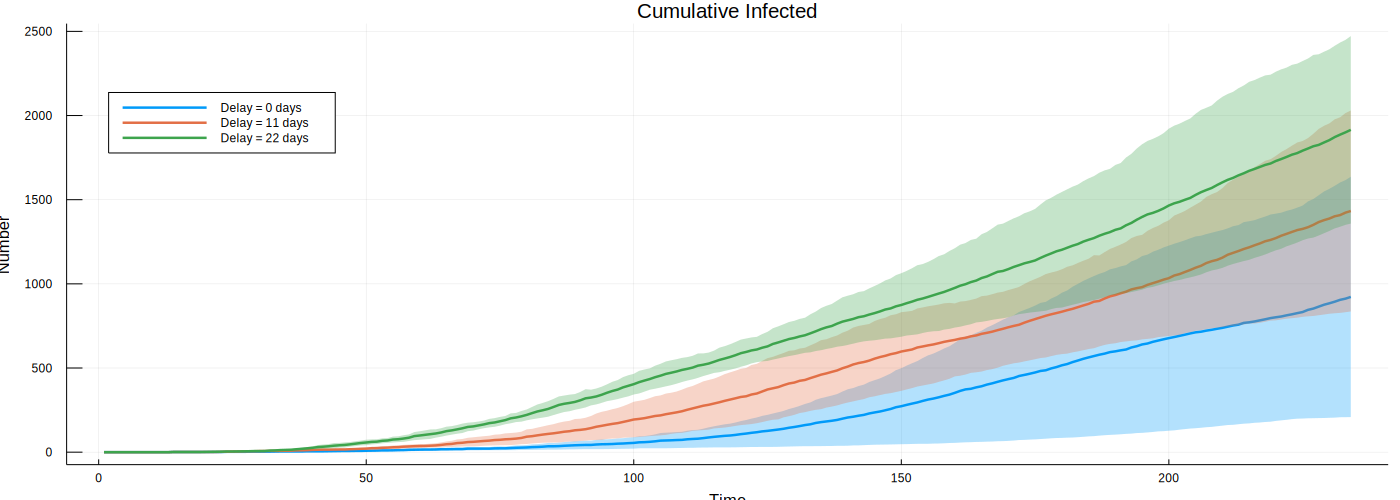

In [57]:
gd1=groupby(agent_data[1], [:step])
gd2=groupby(agent_data[2], [:step])
gd3=groupby(agent_data[3], [:step])

# Apply translation
ac = vcat(fill(0,32), active_cases["Active Cases"]);
timestep = 1:length(gd1)

cumulative_infected1=[gd1[i].infected_presymptomatic_status.+gd1[i].infected_symptomatic_status.+gd1[i].infected_asymptomatic_status.+gd1[i].recovered_status.+gd1[i].dead_status for i in timestep]
cumulative_infected2=[gd2[i].infected_presymptomatic_status.+gd2[i].infected_symptomatic_status.+gd2[i].infected_asymptomatic_status.+gd2[i].recovered_status.+gd2[i].dead_status for i in timestep]
cumulative_infected3=[gd3[i].infected_presymptomatic_status.+gd3[i].infected_symptomatic_status.+gd3[i].infected_asymptomatic_status.+gd3[i].recovered_status.+gd3[i].dead_status for i in timestep]

f1=[quantile(cumulative_infected1[i], 0.05) for i in 1:length(cumulative_infected1)]
m1=[quantile(cumulative_infected1[i], 0.5) for i in 1:length(cumulative_infected1)]
n1=[quantile(cumulative_infected1[i], 0.95) for i in 1:length(cumulative_infected1)]
f2=[quantile(cumulative_infected2[i], 0.05) for i in 1:length(cumulative_infected2)]
m2=[quantile(cumulative_infected2[i], 0.5) for i in 1:length(cumulative_infected2)]
n2=[quantile(cumulative_infected2[i], 0.95) for i in 1:length(cumulative_infected2)]
f3=[quantile(cumulative_infected3[i], 0.05) for i in 1:length(cumulative_infected3)]
m3=[quantile(cumulative_infected3[i], 0.5) for i in 1:length(cumulative_infected3)]
n3=[quantile(cumulative_infected3[i], 0.95) for i in 1:length(cumulative_infected3)]


plot(timestep, m1,
    title="Cumulative Infected",
	label="Delay = 0 days",
	xlab="Time",
	ylabel="Number",
    size=(1400,500),
	legend=:topleft,
	lw=2.5; 
	ribbon=[m1-f1,n1-m1],
    fillalpha=0.3)
plot!(timestep, m2,lw=2.5, label="Delay = 11 days";  
	ribbon=[m2-f2,n2-m2],
    fillalpha=0.3)
plot!(timestep, m3,lw=2.5, label="Delay = 22 days"; 
	ribbon=[m3-f3,n3-m3],
    fillalpha=0.3)

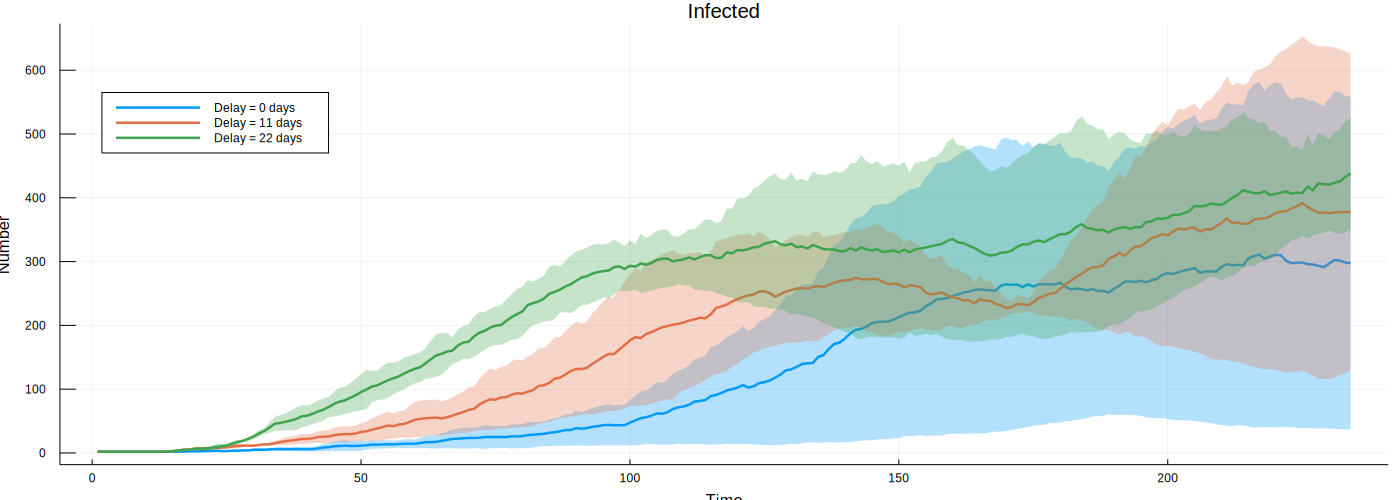

In [53]:
f1=[quantile(gd1[i].infected_status,0.05) for i in timestep]
m1=[quantile(gd1[i].infected_status,0.5) for i in timestep] 
n1=[quantile(gd1[i].infected_status,0.95) for i in timestep]
f2=[quantile(gd2[i].infected_status,0.05) for i in timestep]
m2=[quantile(gd2[i].infected_status,0.5) for i in timestep] 
n2=[quantile(gd2[i].infected_status,0.95) for i in timestep]
f3=[quantile(gd3[i].infected_status,0.05) for i in timestep]
m3=[quantile(gd3[i].infected_status,0.5) for i in timestep] 
n3=[quantile(gd3[i].infected_status,0.95) for i in timestep]


plot(timestep, m1,
    title="Infected",
	label="Delay = 0 days",
	xlab="Time",
	ylabel="Number",
    size=(1400,500),
	legend=:topleft,
	lw=2.5; 
	ribbon=[m1-f1,n1-m1],
    fillalpha=0.3)
plot!(timestep, m2,lw=2.5, label="Delay = 11 days";  
	ribbon=[m2-f2,n2-m2],
    fillalpha=0.3)
plot!(timestep, m3,lw=2.5, label="Delay = 22 days"; 
	ribbon=[m3-f3,n3-m3],
    fillalpha=0.3)

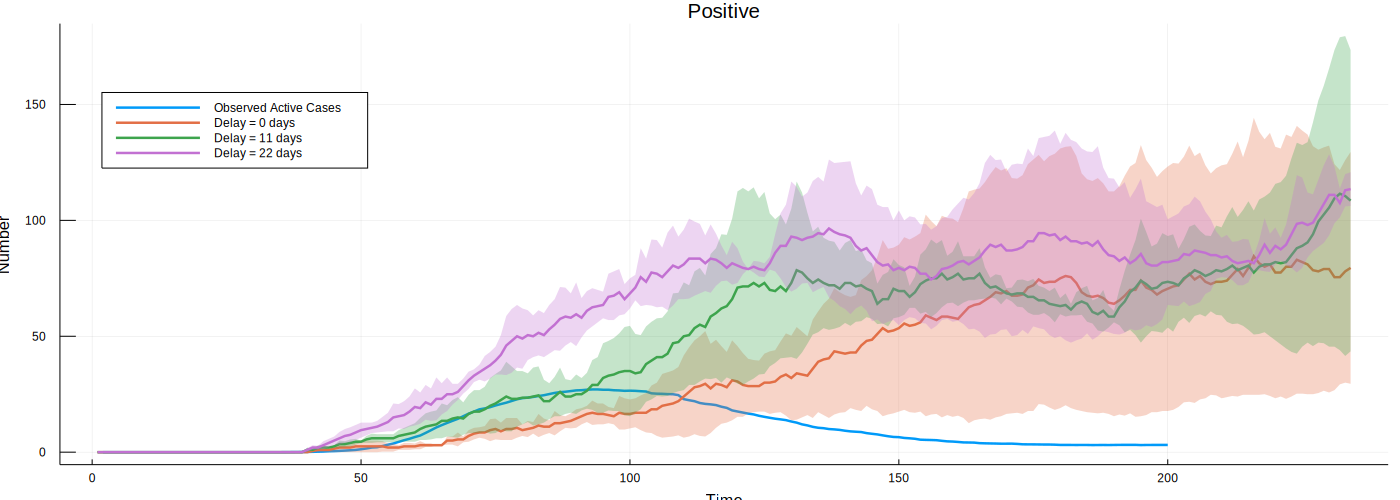

In [56]:
f1=[quantile(gd1[i].positive_diagnosis,0.05) for i in timestep]
m1=[quantile(gd1[i].positive_diagnosis,0.5) for i in timestep] 
n1=[quantile(gd1[i].positive_diagnosis,0.95) for i in timestep]
f2=[quantile(gd2[i].positive_diagnosis,0.05) for i in timestep]
m2=[quantile(gd2[i].positive_diagnosis,0.5) for i in timestep] 
n2=[quantile(gd2[i].positive_diagnosis,0.95) for i in timestep]
f3=[quantile(gd3[i].positive_diagnosis,0.05) for i in timestep]
m3=[quantile(gd3[i].positive_diagnosis,0.5) for i in timestep] 
n3=[quantile(gd3[i].positive_diagnosis,0.95) for i in timestep]

plot(timestep[2:200],ac[2:200]/(scale_factor),
	  label="Observed Active Cases",
	  lw=2.5)
plot!(timestep, m1,
    title="Positive",
	label="Delay = 0 days",
	xlab="Time",
	ylabel="Number",
    size=(1400,500),
	legend=:topleft,
	lw=2.5; 
	ribbon=[m1-f1,n1-m1],
    fillalpha=0.3)
plot!(timestep, m2,lw=2.5, label="Delay = 11 days";  
	ribbon=[m2-f2,n2-m2],
    fillalpha=0.3)
plot!(timestep, m3,lw=2.5, label="Delay = 22 days"; 
	ribbon=[m3-f3,n3-m3],
    fillalpha=0.3)